In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.sparse import csr_matrix
from typing import List
from tqdm import tqdm

In [2]:
data = pd.read_csv('C:\\labs\\laba3\\data\\transactions_train.csv')
articles = pd.read_csv('C:\\labs\\laba3\\data\\articles.csv')
customers = pd.read_csv('C:\\labs\\laba3\\data\\customers.csv')

In [3]:
data.sample(1)

,t_dat,customer_id,article_id,price,sales_channel_id
1212447,2018-10-15,ce59038b6b5c2e2221edd438f7c0784a6778fcf64896b2...,609787011,0.011847,2


In [4]:
articles.sample(1)

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
66402,747737001,747737,B Leila Sarong,300,Sarong,Swimwear,1010016,Solid,9,Black,...,Swimwear,B,Lingeries/Tights,1,Ladieswear,60,"Womens Swimwear, beachwear",1018,Swimwear,Sarong in an airy weave. Size 130x150 cm.


In [5]:
customers.sample(1)

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
1199605,dfd213d798c4d3538d6c28d77fcd58f71818ce74b1ad48...,1.0,1.0,ACTIVE,Regularly,55.0,cb331ba27df2027dc4efebb45007de3459f51d485d87df...


In [6]:
print("Количество записей о транзакциях: ", data.shape[0])
print("Количество покупателей в истории транзакций: ", data['customer_id'].unique().shape[0])
print("Количество пользователей в системе: ", customers['customer_id'].unique().shape[0])
print("Количество айтемов в истории транзакций: ", data['article_id'].unique().shape[0])
print("Количество пользователей в системе: ", articles['article_id'].unique().shape[0])

Количество записей о транзакциях:  31788324
Количество покупателей в истории транзакций:  1362281
Количество пользователей в системе:  1371980
Количество айтемов в истории транзакций:  104547
Количество пользователей в системе:  105542


In [7]:
print('Количество уникальных категорий в product_type_name ', articles.product_type_name.unique().shape[0])
print('Количество уникальных категорий в product_group_name ', articles.product_group_name.unique().shape[0])
print('Количество уникальных категорий в index_group_name ', articles.index_group_name.unique().shape[0])
print('Количество уникальных категорий в garment_group_name ', articles.garment_group_name.unique().shape[0])

Количество уникальных категорий в product_type_name  131
Количество уникальных категорий в product_group_name  19
Количество уникальных категорий в index_group_name  5
Количество уникальных категорий в garment_group_name  21


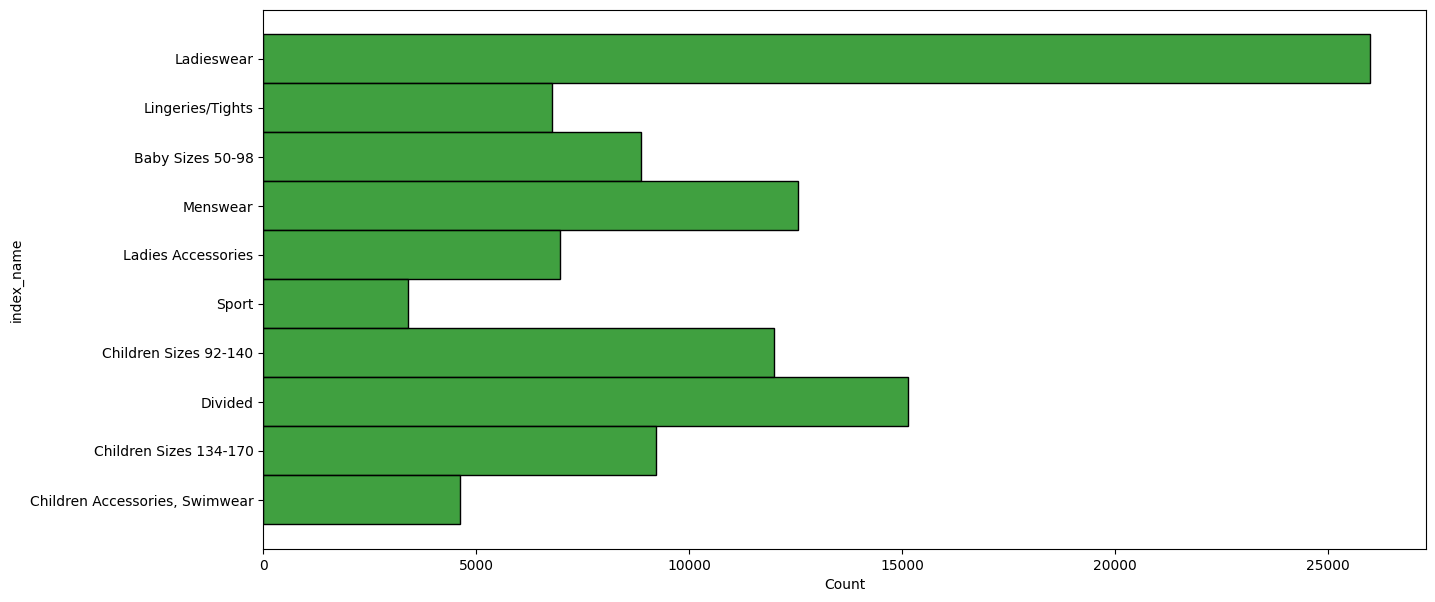

In [8]:
f, ax = plt.subplots(figsize = (15,7))
ax = sns.histplot(data = articles, y = "index_name", color = 'green')
plt.show()


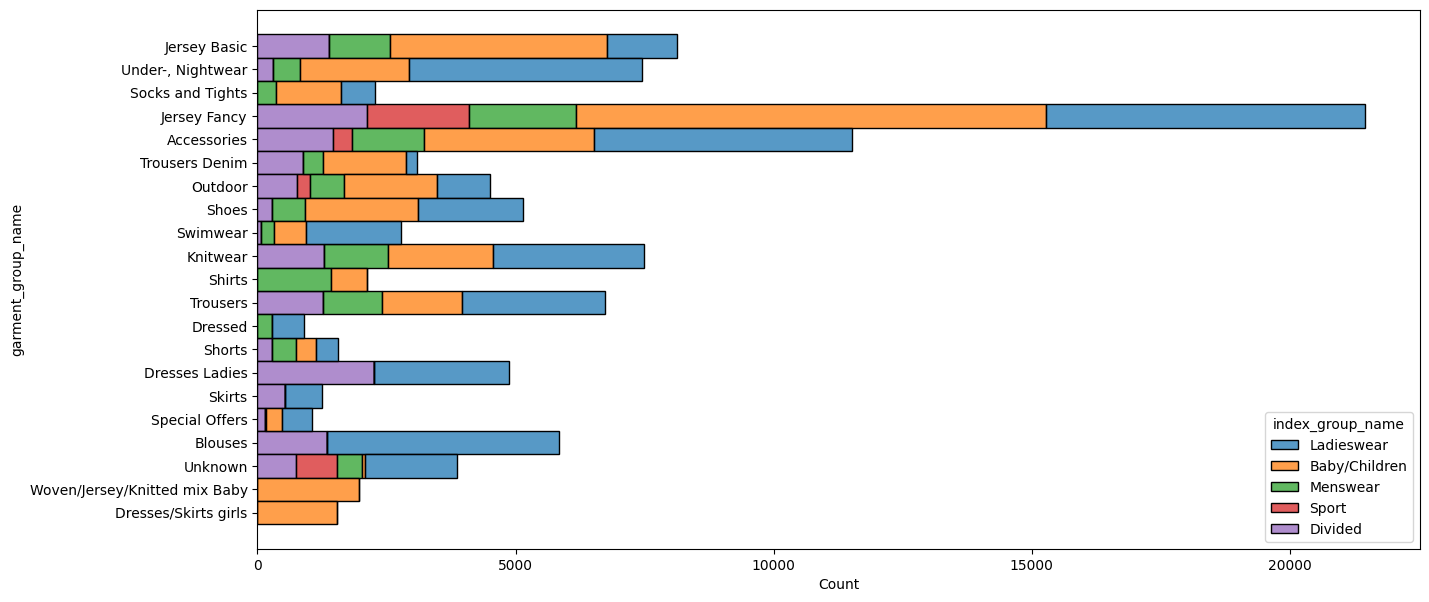

In [9]:
f, ax = plt.subplots(figsize = (15,7))
ax = sns.histplot(data = articles, y = "garment_group_name", color = 'green', hue = 'index_group_name', multiple = 'stack')
plt.show()
plt.show()

In [10]:
articles.groupby(['index_group_name', 'index_name']).count()['article_id']

index_group_name  index_name                    
Baby/Children     Baby Sizes 50-98                   8875
                  Children Accessories, Swimwear     4615
                  Children Sizes 134-170             9214
                  Children Sizes 92-140             12007
Divided           Divided                           15149
Ladieswear        Ladies Accessories                 6961
                  Ladieswear                        26001
                  Lingeries/Tights                   6775
Menswear          Menswear                          12553
Sport             Sport                              3392
Name: article_id, dtype: int64

In [11]:
pd.options.display.max_rows = None
articles.groupby(['product_group_name', 'product_type_name']).count()['article_id']

product_group_name     product_type_name       
Accessories            Accessories set                 7
                       Alice band                      6
                       Baby Bib                        3
                       Bag                          1280
                       Beanie                         56
                       Belt                          458
                       Bracelet                      180
                       Braces                          3
                       Bucket hat                      7
                       Cap                            13
                       Cap/peaked                    573
                       Dog Wear                       20
                       Earring                      1159
                       Earrings                       11
                       Eyeglasses                      2
                       Felt hat                       10
                       Giftbox          

In [12]:
d = (
    data
    .groupby('article_id')
    .size()
    .reset_index(name='purchase_count')
)

In [13]:
print("Статистика популярности товаров:")
print(f"Всего уникальных товаров: {len(d)}")
print(f"Медиана покупок: {d['purchase_count'].median()}")
print(f"Среднее покупок: {d['purchase_count'].mean()}")
print(f"Максимум покупок: {d['purchase_count'].max()}")
print(f"Минимум покупок: {d['purchase_count'].min()}")

Статистика популярности товаров:
Всего уникальных товаров: 104547
Медиана покупок: 65.0
Среднее покупок: 304.057734798703
Максимум покупок: 50287
Минимум покупок: 1


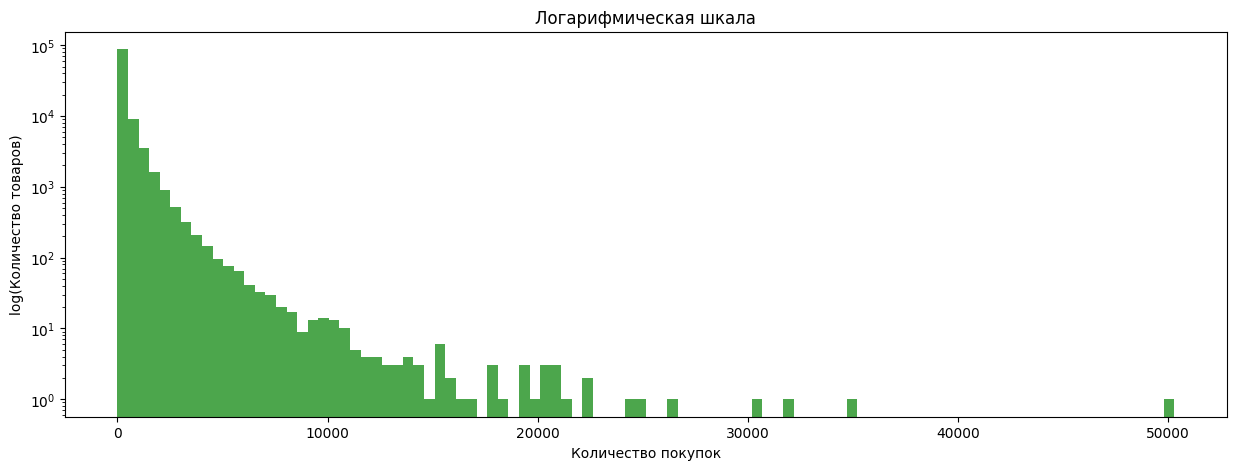

In [14]:
plt.figure(figsize=(15, 5))
plt.hist(d['purchase_count'], bins=100, alpha=0.7, color='green')
plt.yscale('log')
plt.title('Логарифмическая шкала')
plt.xlabel('Количество покупок')
plt.ylabel('log(Количество товаров)')
plt.show()

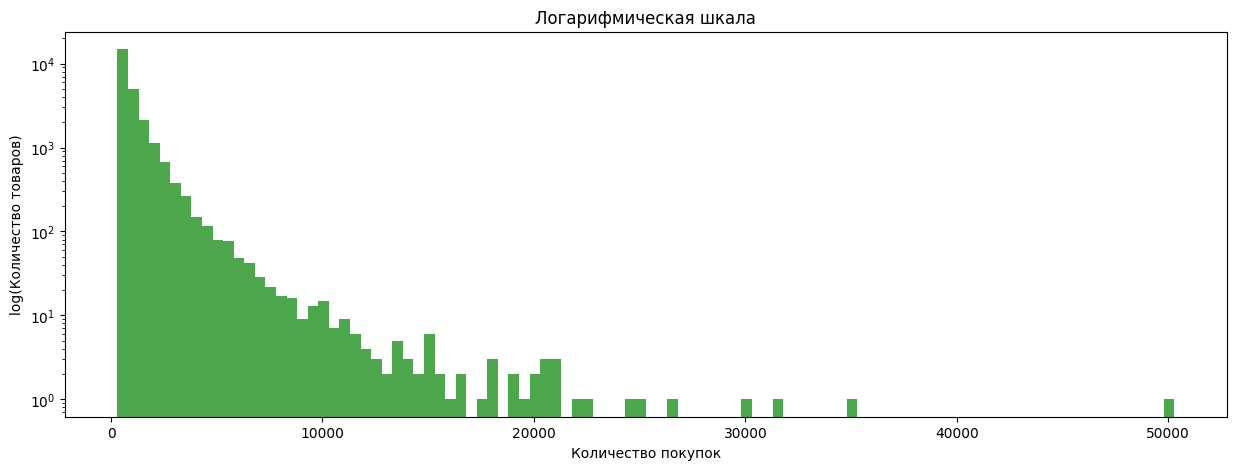

In [15]:
clean_data = d[d['purchase_count'] > 304]

plt.figure(figsize=(15, 5))
plt.hist(clean_data['purchase_count'], bins=100, alpha=0.7, color='green')
plt.yscale('log')
plt.title('Логарифмическая шкала')
plt.xlabel('Количество покупок')
plt.ylabel('log(Количество товаров)')
plt.show()

In [16]:
mask = articles['article_id'].isin(clean_data['article_id'])
articles = articles[mask]
articles.shape[0]

mask = data['article_id'].isin(clean_data['article_id'])
data = data[mask]

In [17]:
data.shape[0]

26587499

Бейз лайн если хотим рекомендовать товары без истории покупок

In [18]:
def top_popularity_items(df: pd.DataFrame, k: int = 10) -> List[int]:
    """
        Создает бейзлайн-рекомендации на основе популярных айтемов 
        по всей истории покупок

        df - история покупок 
        k - количество топ айтемов    
    
    """
    top_items = (
        df
        .groupby("article_id", as_index = False)["customer_id"]
        .count()
        .rename(columns = {'customer_id': "purchase_count"})
        .sort_values("purchase_count", ascending = False)
        .head(k)
        ["article_id"]
        .tolist()
    )
    return top_items

In [19]:
top_k_items = top_popularity_items(data, k = 10)

In [20]:
top_k_items

[706016001,
 706016002,
 372860001,
 610776002,
 759871002,
 464297007,
 372860002,
 610776001,
 399223001,
 706016003]

In [21]:
prepare_date = data.merge(
    articles[['article_id', 'index_group_name', 'product_group_name']],
    on = 'article_id',
    how = 'left'
)
prepare_date = prepare_date[['customer_id', 'article_id', 'index_group_name', 'product_group_name']]
prepare_date.head(5)

,customer_id,article_id,index_group_name,product_group_name
0,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,Ladieswear,Underwear
1,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,Ladieswear,Underwear
2,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,Ladieswear,Garment Upper body
3,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,Ladieswear,Garment Upper body
4,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687001,Ladieswear,Garment Upper body


In [41]:
prepare_date[prepare_date['article_id'] == None]

,customer_id,article_id,index_group_name,product_group_name


In [29]:
def top_popularity_items_by_index(df: pd.DataFrame,index: str, k: int = 10) -> List[int]:
    """
        Создает бейзлайн-рекомендации на основе популярных айтемов 
        по всей каждой группы индексов покупок (женские товары, 
        мужские, детские, спорт)

        df - история покупок 
        k - количество топ айтемов    
    
    """
    top_items = (
        df[df['index_group_name'] == index]
        .groupby( "article_id", as_index = False)["customer_id"]
        .count()
        .rename(columns = {'customer_id': "purchase_count"})
        .sort_values("purchase_count", ascending = False)
        .head(k)
        ["article_id"]
        .tolist()
    )
    return top_items

In [30]:
top_k_items_by_index = top_popularity_items_by_index(prepare_date, "Ladieswear", 10)

In [31]:
top_k_items_by_index

[372860001,
 610776002,
 464297007,
 372860002,
 610776001,
 156231001,
 562245046,
 562245001,
 351484002,
 399256001]

In [32]:
def top_popularity_items_by_product(df: pd.DataFrame, product: str, k: int = 10) -> List[int]:
    """
        Создает бейзлайн-рекомендации на основе популярных айтемов 
        по всей каждой группы товаров 

        df - история покупок 
        k - количество топ айтемов    
    
    """
    top_items = (
        df[df['product_group_name'] == product]
        .groupby("article_id", as_index = False)["customer_id"]
        .count()
        .rename(columns = {'customer_id': "purchase_count"})
        .sort_values("purchase_count", ascending = False)
        .head(k)
        ["article_id"]
        .tolist()
    )
    return top_items

In [33]:
top_k_items_by_product = top_popularity_items_by_product(prepare_date,"Underwear", 10)

In [34]:
top_k_items_by_product

[464297007,
 719655001,
 723469001,
 611415001,
 564786001,
 579302001,
 736530007,
 507883009,
 611415005,
 470789001]

Создам матрицу взаимодействия user-item

In [35]:
print(f'Количество строк датасета: ', prepare_date.shape[0])
print(f'Количество уникальных покупателей: ', prepare_date.customer_id.unique().shape[0])
print(f'Количество уникальных айтемов: ', prepare_date.article_id.unique().shape[0])

Количество строк датасета:  26587499
Количество уникальных покупателей:  1304158
Количество уникальных айтемов:  25098


словари для переиндексирования уникальных айдишников айтемов и покупателей

In [36]:
user_id_to_uid = {}
item_id_to_iid = {}

сборка user-item матрицы: 
1. по истории покупок соберем истории покупкок все i товаров для k пользователя 

In [68]:
purches_list = []
customers_list = []
items_list = []
for row in tqdm(prepare_date.itertuples()):
    uid = user_id_to_uid.setdefault(row.customer_id, len(user_id_to_uid))
    iid = item_id_to_iid.setdefault(row.article_id, len(item_id_to_iid))
    customers_list.append(uid)
    items_list.append(iid)
    purches_list.append(1)
    
user_item_matrix = csr_matrix(
    (purches_list, (customers_list, items_list)),
    shape=(max(customers_list) + 1, max(items_list) + 1)
)

26587499it [01:34, 280058.37it/s]


Для реализации item_based подхода соберу item-item матрицу

In [69]:
shape_m = user_item_matrix.T.shape[0]
print(f'Размерность матрицы item-item {shape_m} * {shape_m} = {shape_m*shape_m}')

Размерность матрицы item-item 25098 * 25098 = 629909604


In [70]:
matrix = user_item_matrix.T

In [72]:
print(f"Тип матрицы: {type(matrix)}")
print(f"Формат матрицы: {matrix.format if hasattr(matrix, 'format') else 'unknown'}")

Тип матрицы: <class 'scipy.sparse._csc.csc_matrix'>
Формат матрицы: csc
Тип матрицы: <class 'scipy.sparse._csr.csr_matrix'>


In [73]:
matrix = matrix.tocsr()
print(f"Тип матрицы: {type(matrix)}")

Тип матрицы: <class 'scipy.sparse._csr.csr_matrix'>


In [74]:
matrix.shape

(25098, 1304158)

In [75]:
norms = np.sqrt(np.array(matrix.power(2).sum(axis = 1))).flatten()

In [76]:
row_indices = np.repeat(np.arange(matrix.shape[0]), np.diff(matrix.indptr))

In [77]:
data_norm = matrix.data / norms[row_indices]

In [ ]:
matrix_norm = csr_matrix((data_norm, matrix.indices, matrix.indptr), shape=matrix.shape)

In [79]:
item_item = matrix_norm.dot(matrix_norm.T)

In [82]:
from scipy.sparse import csr_matrix

def cosine_similarity(matrix):
    """
    Вычисляет косинусную схожесть

    matrix  - sparse.csr_matrix    (размерность - items*users)
    """
    matrix = matrix.tocsr()
    norms = np.sqrt(np.array(matrix.power(2).sum(axis = 1))).flatten()
    row_indices = np.repeat(np.arange(matrix.shape[0]), np.diff(matrix.indptr))
    data_norm = matrix.data / norms[row_indices]
    matrix_norm = csr_matrix((data_norm, matrix.indices, matrix.indptr), shape=matrix.shape)
    item_item = matrix_norm.dot(matrix_norm.T)
    return item_item

In [83]:
item_item_matrix_sparse = cosine_similarity(user_item_matrix.T)

In [84]:
def nullify_diagonal(matrix):
    positions_range = range(matrix.shape[0])
    matrix_diag_ones = csr_matrix(
        (np.ones(len(positions_range)), (positions_range, positions_range)), 
        matrix.shape
    )
    return csr_matrix(matrix - matrix_diag_ones)

In [85]:
item_item_matrix_wo_diag = nullify_diagonal(item_item_matrix_sparse)

In [86]:
TOP=50
item_item_rows = []
item_item_cols = []
item_item_data = []
not_top_k_indices_list = []
empty_indices_list = []
for i, item_item_row in tqdm(enumerate(item_item_matrix_wo_diag)):
    if item_item_row.nnz > TOP:
        top_row_args = np.argsort(item_item_row.data)[-TOP:]
        item_item_rows += [i] * TOP
        item_item_cols += item_item_row.indices[top_row_args].tolist()
        item_item_data += item_item_row.data[top_row_args].tolist()
    elif item_item_row.nnz > 0:
        not_top_k_indices_list.append(i)
        item_item_rows += [i] * item_item_row.nnz
        item_item_cols += item_item_row.indices.tolist()
        item_item_data += item_item_row.data.tolist()
    else:
        empty_indices_list.append(i)
        

25098it [00:22, 1123.42it/s]


In [87]:
item_item_topk_matrix = csr_matrix(
    (
        item_item_data, 
        (item_item_rows, item_item_cols)
    ),
    shape=(item_item_matrix_wo_diag.shape[0], item_item_matrix_wo_diag.shape[1])
)

получить вектор предсказаний для нового пользователя

In [89]:
user_selected_labels = [ 598859003,
 688873020,
 688873011,
 531310002,
 529841001,
 501820043,
]

In [90]:
selected_articles = articles[articles['article_id'].isin(user_selected_labels)]
selected_index_groups = selected_articles['index_group_name'].unique()
selected_product_groups = selected_articles['product_group_name'].unique()
matching_articles = articles[
    (articles['index_group_name'].isin(selected_index_groups)) |
    (articles['product_group_name'].isin(selected_product_groups))
]
new_user_vector = np.zeros(len(item_id_to_iid), dtype = int)
for article_id in item_id_to_iid:
    idx = item_id_to_iid[article_id]
    new_user_vector[idx] =1

In [91]:
most_similar_items = np.argsort(np.ravel(new_user_vector))[-10:]
iid_to_item_id = {v: k for k,v in item_id_to_iid.items()}
articles[articles["article_id"].isin([iid_to_item_id[item] for item in most_similar_items])]

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
40179,663713001,663713,Atlanta Push Body Harlow,283,Underwear body,Underwear,1010016,Solid,9,Black,...,Expressive Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Lace push-up body with underwired, moulded, pa..."
97255,873279005,873279,Osman,252,Sweater,Garment Upper body,1010016,Solid,92,Green,...,Knitwear,A,Ladieswear,1,Ladieswear,15,Womens Everyday Collection,1003,Knitwear,Slightly shorter polo-neck jumper in a rib kni...
99395,884319002,884319,Lucien CONSCIOUS,258,Blouse,Garment Upper body,1010016,Solid,9,Black,...,Blouse,A,Ladieswear,1,Ladieswear,15,Womens Everyday Collection,1010,Blouses,Blouse in an airy weave with a stand-up collar...
99769,886566001,886566,MARSH DRESS LOW,265,Dress,Garment Full body,1010016,Solid,9,Black,...,Dresses,D,Divided,2,Divided,53,Divided Collection,1013,Dresses Ladies,"Short, A-line dress in velour with a deep V-ne..."
100298,889550002,889550,AUSSIE SHEFFIELD LONG PUFFER,262,Jacket,Garment Upper body,1010016,Solid,9,Black,...,Outdoor/Blazers,D,Divided,2,Divided,53,Divided Collection,1007,Outdoor,"Kangol x H&M. Knee-length, padded jacket with ..."
103052,909059002,909059,Alina HW slim dnm Trs,272,Trousers,Garment Lower body,1010016,Solid,72,Blue,...,Trousers,D,Divided,2,Divided,53,Divided Collection,1009,Trousers,"5-pocket jeans in washed, stretch cotton denim..."
104951,929275001,929275,Hudson PU wide leg,272,Trousers,Garment Lower body,1010018,Treatment,9,Black,...,Trouser,A,Ladieswear,1,Ladieswear,15,Womens Everyday Collection,1009,Trousers,5-pocket trousers in soft imitation leather wi...
105011,930380001,930380,Ruccola,258,Blouse,Garment Upper body,1010001,All over pattern,31,Light Orange,...,Blouse,A,Ladieswear,1,Ladieswear,15,Womens Everyday Collection,1010,Blouses,Slightly longer blouse in an airy weave with a...
105223,934835001,934835,dad slouchy co lab OL,255,T-shirt,Garment Upper body,1010014,Placement print,9,Black,...,Tops Fancy Jersey,D,Divided,2,Divided,53,Divided Collection,1005,Jersey Fancy,Kangol x H&M. Oversized T-shirt in cotton jers...
105244,935541001,935541,Aussi Leaf midi dress,265,Dress,Garment Full body,1010016,Solid,9,Black,...,Price Items,D,Divided,2,Divided,50,Divided Projects,1001,Unknown,"Kangol x H&M. Fitted, calf-length dress in sof..."


In [93]:
index_group_name_list = articles['index_group_name'].unique()
product_group_name_list = articles['product_group_name'].unique()

In [97]:
df = pd.DataFrame(index_group_name_list, columns=['items'])
df.to_csv('index_group_name_list.csv', index=False, encoding='utf-8')

df = pd.DataFrame(product_group_name_list, columns=['items'])
df.to_csv('product_group_name_list.csv', index=False, encoding='utf-8')